In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, contour, contourf, Circle, Rectangle, pie
from matplotlib import ticker, gridspec
import matplotlib as mpl
import prodimopy.read as pread
#import prodimopy.plot as pplot
from scipy.interpolate import griddata
from scipy.integrate import odeint
from random import random, randint
import pickle
import os
from scipy.stats import skew
from scipy.optimize import curve_fit
from scipy.special import expn
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter

import shampoo
import pplot

ImportError: No module named 'seaborn'

In [ ]:
%load_ext autoreload
%autoreload 2

# Disk Analysis

In [6]:
disk = shampoo.Disk(species=["H2O", "CO", "CO2", "CH4", "NH3", "H2S", "SO2", "S"], folder="../ShampooBackground", modelName="ProDiMo.out", 
                         t_index="{:03d}".format(5))

['H2O', 'CO', 'CO2', 'CH4', 'NH3', 'H2S', 'SO2', 'S']
READ: Reading File:  ../ShampooBackground/ProDiMo_005.out  ...
READ: Reading File:  ../ShampooBackground/Species.out  ...
READ: Reading File:  ../ShampooBackground/FlineEstimates_005.out  ...
READ: Reading File:  ../ShampooBackground/Elements.out  ...
READ: Reading File:  ../ShampooBackground/dust_opac.out  ...
READ: Reading File:  ../ShampooBackground/dust_sigmaa.out  ...
READ: Reading File:  ../ShampooBackground/StarSpectrum.out  ...
READ: Reading File:  ../ShampooBackground/SED.out  ...
WARN: Could not open ../ShampooBackground/SEDana.out!
READ: Reading File:  ../ShampooBackground/image.out  ...
READ: Reading File:  ../ShampooBackground/Parameter.out  ...
INFO: Reading time:  1.49 s
 
READ: Reading File:  ../ShampooBackground/dust_opac.out  ...
READ: Reading File:  ../ShampooBackground/dust_sigmaa.out  ...
Finished doing interpolation


In [4]:
disk300 = shampoo.Disk(species=["H2O", "CO", "CO2", "CH4", "NH3", "H2S", "SO2", "S"], folder="../ShampooBackground", modelName="ProDiMo.out", 
                         t_index="{:03d}".format(6))

['H2O', 'CO', 'CO2', 'CH4', 'NH3', 'H2S', 'SO2', 'S']
READ: Reading File:  ../ShampooBackground/ProDiMo_006.out  ...
READ: Reading File:  ../ShampooBackground/Species.out  ...
READ: Reading File:  ../ShampooBackground/FlineEstimates_006.out  ...
READ: Reading File:  ../ShampooBackground/Elements.out  ...
READ: Reading File:  ../ShampooBackground/dust_opac.out  ...
READ: Reading File:  ../ShampooBackground/dust_sigmaa.out  ...
READ: Reading File:  ../ShampooBackground/StarSpectrum.out  ...
READ: Reading File:  ../ShampooBackground/SED.out  ...
WARN: Could not open ../ShampooBackground/SEDana.out!
READ: Reading File:  ../ShampooBackground/image.out  ...
READ: Reading File:  ../ShampooBackground/Parameter.out  ...
INFO: Reading time:  1.42 s
 
READ: Reading File:  ../ShampooBackground/dust_opac.out  ...
READ: Reading File:  ../ShampooBackground/dust_sigmaa.out  ...
Finished doing interpolation


PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...


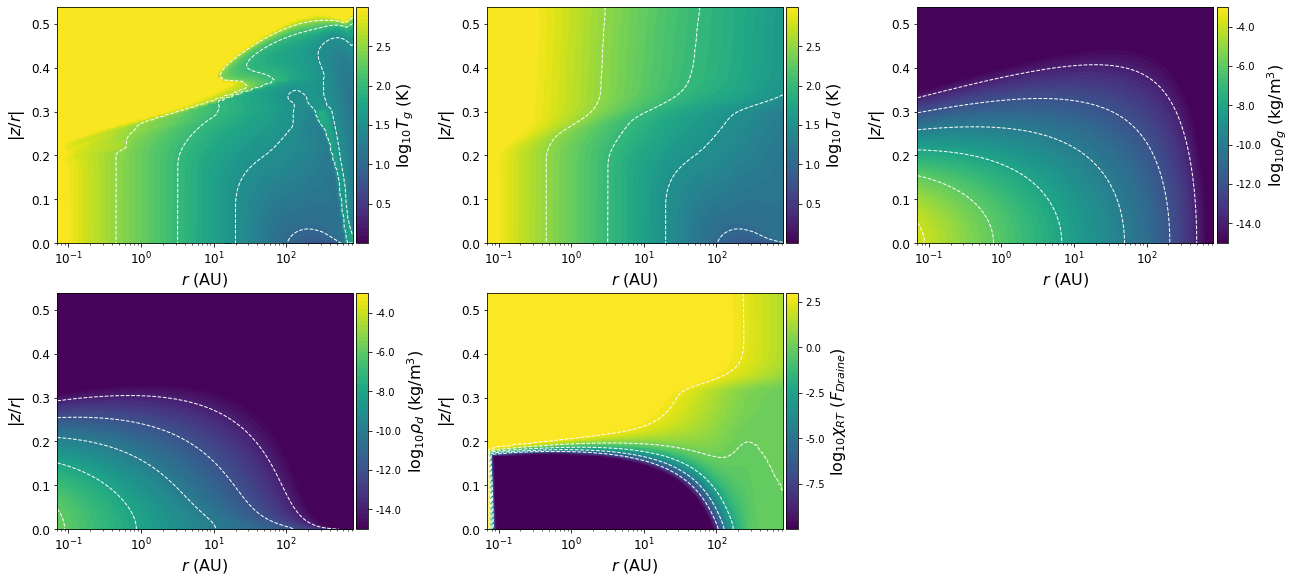

In [8]:
mpl.rcParams['legend.fontsize'] = 16
def makeBackgroundModelOverviewBasicStructure(disk, time):

    #disk = shampoo.Disk(species=["H2O", "CO", "CO2", "CH4", "NH3", "H2S"], folder="./shampooBackground", modelName="ProDiMo.out", 
    #                     t_index="{:03d}".format(5))
    
    fig = figure(figsize=(18,8))
    
    frameLabel = [r"$\log_{10}T_g$ (K)", r"$\log_{10}T_d$ (K)", r"$\log_{10}\rho_g$ (kg/m$^3$)", r"$\log_{10}\rho_d$ (kg/m$^3$)", 
                  r"$\log_{10}\chi_{RT}$ ($F_{Draine}$)"]
    frameList = [fig.add_subplot(2,3,n) for n in range(1,6)]
    frameQuant = [disk.model.tg, disk.model.td, disk.model.rhog*1e3, disk.model.rhod*1e3, disk.model.chiRT]
    frameLims = [[1e0,1e3],[1e0,1e3],[1e-15, 1e-3],[1e-15, 1e-3],[1e-10,1e3]]
    
    for n in range(5):
        
        lims = frameLims[n]
        (frameQuant[n])[frameQuant[n]>lims[1]] = lims[1]
        (frameQuant[n])[frameQuant[n]<lims[0]] = lims[0]
        
        pp = pplot.Plot(None, fs_legend=16)
        pp.plot_cont(disk.model, frameQuant[n], label=frameLabel[n], zlog=True, grid=False, zlim=frameLims[n], zr=True, clevels=None, 
                     clabels=None, contour=True, extend='neither', oconts=None, acont=None, acontl=None, nbins=70, bgcolor=None, 
                     cb_format='%.1f', scalexy=[1, 1], patches=None, rasterized=False, returnFig=False, fig=fig, ax=frameList[n], movie=False)
        #colorbar.set_label(frameLabel[n], fontsize=16)
        frameList[n].tick_params(labelsize=12)
        frameList[n].set_xlabel("$r$ (AU)", fontsize=16)
        frameList[n].set_ylabel("$|z/r|$",fontsize=16)
        #frameList[n].
    
    #fig.suptitle("Disk structure at t={:.2e} yr".format(time), fontsize=16, y=1.01)
    fig.tight_layout(pad=.4)
    for fmt in ["svg","pdf","png"]:
        fig.savefig("./Figures/21_{:.2e}".format(time)+"BackgroundModelStructure."+fmt, format=fmt, bbox_inches = 'tight', pad_inches = 0.1)    

makeBackgroundModelOverviewBasicStructure(disk, 2e5)

In [2]:
def plotChemicalDiskProperties(disk):
    time = 2e5
    #disk = shampoo.Disk(species=["H2O", "CO", "CO2", "CH4", "NH3", "H2S"], folder="./shampooBackground", modelName="ProDiMo.out", 
    #                     t_index="{:03d}".format(5))
    
    
    frameLabel = disk.species
    fig = figure(figsize=(12,3*len(frameLabel)))
    frameList = [fig.add_subplot(len(frameLabel),2,n) for n in range(1,2*len(frameLabel)+1)]
    frameQuant = [None]*len(frameList)
    frameLabels = [None]*len(frameQuant)
    for n in range(len(frameQuant)):
        
        if n%2==0:
            indexGas = disk.model.spnames[frameLabel[int(np.floor(n/2))]]
            frameQuant[n] = disk.model.nmol[:,:,indexGas]*1e6
            frameLabels[n] = frameLabel[int(np.floor(n/2))]+" gas number density"
            print(frameLabels[n],":","{:.2e}".format(disk.model.nmol[np.argmin(abs(10-disk.model.x[:,0])),0,indexGas]*1e6))
            
        elif n%2==1:
            indexIce = disk.model.spnames[frameLabel[int(np.floor(n/2))]+"#"]
            frameQuant[n] = disk.model.nmol[:,:,indexIce]*1e6
            frameLabels[n] = frameLabel[int(np.floor(n/2))]+" ice number density"
            
#         elif n%3==2:
#             frameQuant[n] = frameQuant[n-2]+frameQuant[n-1]
#             frameLabels[n] = frameLabel[int(np.floor(n/3))]+" total number density"
    

    #print(frameQuant)
    for n in range(len(frameQuant)):
        
        lims = [1,1e20]
        (frameQuant[n])[frameQuant[n]>lims[1]] = lims[1]
        (frameQuant[n])[frameQuant[n]<lims[0]] = lims[0]
        
        pp = pplot.Plot(None, fs_legend=14)
        pp.plot_cont(disk.model, frameQuant[n], label=frameLabels[n], zlog=True, grid=False, zlim=lims, zr=True, clevels=None, 
                     clabels=None, contour=True, extend='neither', oconts=None, acont=None, acontl=None, nbins=70, bgcolor=None, 
                     cb_format='%.1f', scalexy=[1, 1], patches=None, rasterized=False, returnFig=False, fig=fig, ax=frameList[n], movie=False)

        frameList[n].tick_params(labelsize=10)
        frameList[n].set_xlabel("$r$ (AU)", fontsize=14)
        frameList[n].set_ylabel("$|z/r|$",fontsize=14)

   # fig.suptitle("Disk abundances at t={:.2e} yr".format(time), fontsize=16, y=1.01)
    fig.tight_layout(pad=.4)
    
    for fmt in ["svg","pdf","png"]:
        fig.savefig("./AA_{:.2e}".format(time)+"BackgroundModelAbundances."+fmt, format=fmt, bbox_inches = 'tight', pad_inches = 0.1) 

plotChemicalDiskProperties(disk)
    
# models = [diskList[i].model for i in range(len(diskList))]    
# for species in ["H2O", "CO", "CO2"]:
#     pm=pmovie.ContourMovie(timeList,models,[2.e-9,2.e-4],species=species,nframes=100,plot_cont_dict={"zr": True})
#     pm.make_movie(species+".mp4")

NameError: name 'disk' is not defined

 ------------------------------------------------------------------------ 
|                                                                        |
|                           Welcome to SHAMPOO                           |
|                                                                        |
|                      StocHAstic Monomer PrOcessOr                      |
|                                                                        |
|          Dynamical, collisional and ice processing since 2022          |
|                                                                        |
 ------------------------------------------------------------------------ 
Attempting to load parameters from folder:  ./InputFiles/FullBasic
Attempt succesful!
Initializing model
['H2O', 'CO', 'CO2', 'CH4', 'NH3', 'H2S']
READ: Reading File:  ../ShampooBackground/ProDiMo_005.out  ...
READ: Reading File:  ../ShampooBackground/Species.out  ...
READ: Reading File:  ../ShampooBackground/FlineEstimates

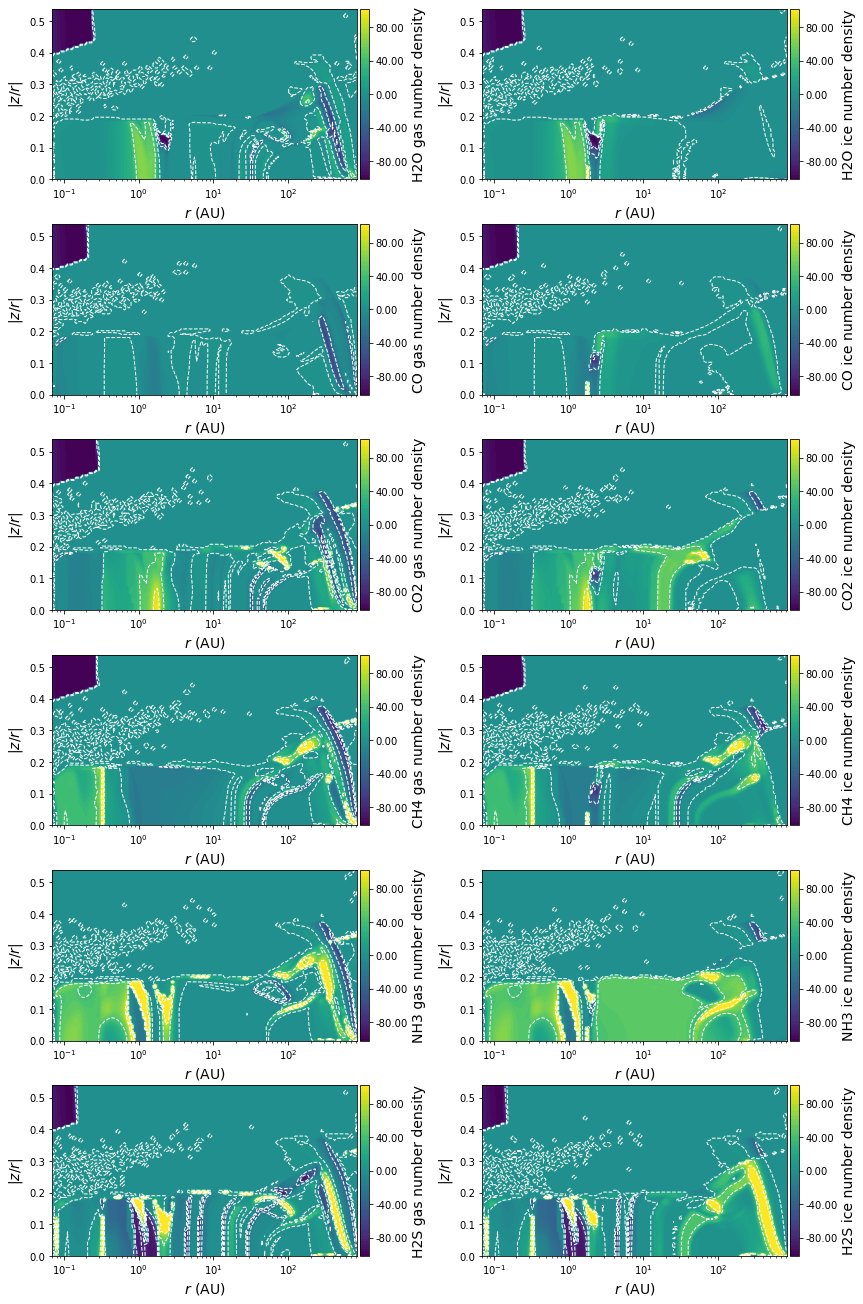

In [20]:
def plotChemicalDifferences(diskOld, diskNew, delt):

    
    #disk = shampoo.Disk(species=["H2O", "CO", "CO2", "CH4", "NH3", "H2S"], folder="./shampooBackground", modelName="ProDiMo.out", 
    #                     t_index="{:03d}".format(5))
    
    mod = shampoo.Model(parameter_folder="./InputFiles/FullBasic")
    
    
    frameLabel = diskOld.species
    fig = figure(figsize=(12,3*len(frameLabel)))
    frameList = [fig.add_subplot(len(frameLabel),2,n) for n in range(1,2*len(frameLabel)+1)]
    frameQuant = [None]*len(frameList)
    frameLabels = [None]*len(frameQuant)
    for n in range(len(frameQuant)):
        
        if n%2==0:
            indexGasOld = diskOld.model.spnames[frameLabel[int(np.floor(n/2))]]
            indexGasNew = diskNew.model.spnames[frameLabel[int(np.floor(n/2))]]
           
            frameQuant[n] = (diskNew.model.nmol[:,:,indexGasNew]-diskOld.model.nmol[:,:,indexGasOld])/diskOld.model.nmol[:,:,indexGasOld]*1e2
            frameLabels[n] = frameLabel[int(np.floor(n/2))]+" gas number density"
            #print(frameLabels[n],":","{:.2e}".format(disk.model.nmol[np.argmin(abs(10-disk.model.x[:,0])),0,indexGas]*1e6))
            print(np.max(frameQuant[n]))
            print(np.min(frameQuant[n]))
        elif n%2==1:
            indexIceOld = diskOld.model.spnames[frameLabel[int(np.floor(n/2))]+"#"]
            indexIceNew = diskNew.model.spnames[frameLabel[int(np.floor(n/2))]+"#"]
           
            frameQuant[n] = (diskNew.model.nmol[:,:,indexIceNew]-diskOld.model.nmol[:,:,indexIceOld])/diskOld.model.nmol[:,:,indexIceOld]*1e2
            frameLabels[n] = frameLabel[int(np.floor(n/2))]+" ice number density"
            
#         elif n%3==2:
#             frameQuant[n] = frameQuant[n-2]+frameQuant[n-1]
#             frameLabels[n] = frameLabel[int(np.floor(n/3))]+" total number density"
    

    #print(frameQuant)
    for n in range(len(frameQuant)):
        
        lims = [-100,100]
        (frameQuant[n])[frameQuant[n]>lims[1]] = lims[1]
        (frameQuant[n])[frameQuant[n]<lims[0]] = lims[0]
        
        pp = pplot.Plot(None, fs_legend=14)
        pp.plot_cont(disk.model, frameQuant[n], label=frameLabels[n], zlog=False, grid=False, zlim=lims, zr=True, clevels=None, 
                     clabels=None, contour=True, extend='neither', oconts=None, acont=None, acontl=None, nbins=70, bgcolor=None, 
                     cb_format='%.2f', scalexy=[1, 1], patches=None, rasterized=False, returnFig=False, fig=fig, ax=frameList[n], movie=False)

        frameList[n].tick_params(labelsize=10)
        frameList[n].set_xlabel("$r$ (AU)", fontsize=14)
        frameList[n].set_ylabel("$|z/r|$",fontsize=14)

   # fig.suptitle("Disk abundances at t={:.2e} yr".format(time), fontsize=16, y=1.01)
    fig.tight_layout(pad=.4)
    
    for fmt in ["svg","pdf","png"]:
        fig.savefig("./Figures/BackGroundModelEvolution."+fmt, format=fmt, bbox_inches = 'tight', pad_inches = 0.1) 

plotChemicalDifferences(disk200, disk300, 100)
